## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

In [1]:
# Pandas -> This imports the 'pandas' library and provides the alias as 'pd'.
import pandas as pd 

# Numpy -> This imports the 'numpy' library and provides the alias as 'np'.
import numpy as np

# subpackage of Matplotlib -> This imports the 'matplotlib' library and provides the alias of 'plt'.
import matplotlib.pyplot as plt

# Seaborn -> This imports the 'seaborn' library and provides it with the alias 'sns'.
import seaborn as sns

# To suppress warnings -> This imports the 'warnings' module into our Python environment.
from warnings import filterwarnings # The 'warnings' module provides functions for controlling how warnings are processed.
filterwarnings('ignore') #This function is a string that specifies how the warnings should be filtered.
                         #The string 'ignore' tells the function to ignore all warnings.



In [2]:
# This Statemnt is used to display all the coloumns of our DataFrame, regardless of the number of columns.
pd.options.display.max_columns = None
# This Statemnt is used to display all the rows of our DataFrame, regardless of the number of rows.
pd.options.display.max_rows = None

#The 'float_format' tells Pandas to display floats with 6 decimal places. 
pd.options.display.float_format = '{:.6f}'.format
# The 'train_test_split' function is used to split a dataset into two subsets: a training set and a test set. 
from sklearn.model_selection import train_test_split

# This imports the stats module from the 'SciPy' library. This module contains correlation functions. 
from scipy import stats
# The 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error #This function is used to calculate the mean absolute error between two sets of values.
from sklearn.metrics import mean_squared_error #This function is used to calculate the mean squared error between two sets of values.
from sklearn.preprocessing import OrdinalEncoder #This class is used to encode categorical data into ordinal values.

#This imports the 'LinearRegression' class from the scikit-learn library.
from sklearn.linear_model import LinearRegression

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [3]:
df=pd.read_csv("C:/Users/fiske/Downloads/DataScience_Portfolio/Portfolio2_Prathika_47806907/cleaned_ecommerce_dataset.csv") 
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.000000,3.000000,M,Restaurants & Gourmet,41,30.740000,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.000000,4.000000,M,Restaurants & Gourmet,74,108.300000,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.000000,4.000000,M,Restaurants & Gourmet,84,69.000000,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.000000,3.000000,M,Movies,68,143.110000,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.000000,3.000000,M,Movies,6,117.890000,4


In [4]:
row_count = len(df) #The len() function returns the number of rows in the DataFrame.
print(f'The DataFrame has {row_count} rows.') 

The DataFrame has 2685 rows.


In [5]:
df.shape

(2685, 11)

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [6]:
df.head(20)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.000000,3.000000,M,Restaurants & Gourmet,41,30.740000,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.000000,4.000000,M,Restaurants & Gourmet,74,108.300000,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.000000,4.000000,M,Restaurants & Gourmet,84,69.000000,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.000000,3.000000,M,Movies,68,143.110000,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.000000,3.000000,M,Movies,6,117.890000,4
5,4081,100399,Good for sci-fi,Matrix,3.000000,3.000000,M,Movies,40,24.510000,4
6,4081,100399,Scary? you bet!,Blair Witch Project,4.000000,3.000000,M,Movies,12,44.000000,4
7,4081,101899,Fox - the 4th basic channel,FOX,4.000000,4.000000,M,Media,25,80.000000,4
8,4081,112099,Amen!,Dogma,4.000000,3.000000,M,Movies,22,87.590000,4
9,4081,122899,mama mia!,Olive Garden,4.000000,3.000000,M,Restaurants & Gourmet,49,32.000000,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [8]:
df.dtypes

userId           int64
timestamp        int64
review          object
item            object
rating         float64
helpfulness    float64
gender          object
category        object
item_id          int64
item_price     float64
user_city        int64
dtype: object

In [9]:
#This is used to count the number of missing values in each column of a DataFrame 'df' and sort the results in descending order.
df.isnull().sum().sort_values(ascending=False)  

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [10]:
# This selects all columns in the DataFrame 'df' that are not of numeric dtype
df_cate = df.select_dtypes(exclude = [np.number])
df_cate.head(10)

,review,item,gender,category
0,Not always McCrap,McDonald's,M,Restaurants & Gourmet
1,I dropped the chalupa even before he told me to,Taco Bell,M,Restaurants & Gourmet
2,The Wonderful World of Wendy,Wendy's,M,Restaurants & Gourmet
3,They actually did it,"South Park: Bigger, Longer & Uncut",M,Movies
4,Hey! Gimme some pie!,American Pie,M,Movies
5,Good for sci-fi,Matrix,M,Movies
6,Scary? you bet!,Blair Witch Project,M,Movies
7,Fox - the 4th basic channel,FOX,M,Media
8,Amen!,Dogma,M,Movies
9,mama mia!,Olive Garden,M,Restaurants & Gourmet


In [11]:
#This selects all columns in the DataFrame 'df' which contains numeric dtype.
df_num = df.select_dtypes(include = [np.number])
df_num.head(10)

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
0,4081,71900,4.000000,3.000000,41,30.740000,4
1,4081,72000,1.000000,4.000000,74,108.300000,4
2,4081,72000,5.000000,4.000000,84,69.000000,4
3,4081,100399,5.000000,3.000000,68,143.110000,4
4,4081,100399,3.000000,3.000000,6,117.890000,4
5,4081,100399,3.000000,3.000000,40,24.510000,4
6,4081,100399,4.000000,3.000000,12,44.000000,4
7,4081,101899,4.000000,4.000000,25,80.000000,4
8,4081,112099,4.000000,3.000000,22,87.590000,4
9,4081,122899,4.000000,3.000000,49,32.000000,4


In [12]:
from sklearn.preprocessing import OrdinalEncoder # This class can be used to encode categorical data into ordinal integers.
encoder = OrdinalEncoder() # This creates an instance of the OrdinalEncoder class.
df_cate_encoder = encoder.fit_transform(df_cate) #This is used to transform the categorical datas 'df_cate' into numerical values. 

In [13]:
df_c= pd.DataFrame(df_cate_encoder, columns = df_cate.columns)

In [14]:
df_c.head(20)

,review,item,gender,category
0,1618.000000,37.000000,1.000000,8.000000
1,1125.000000,67.000000,1.000000,8.000000
2,2185.000000,77.000000,1.000000,8.000000
3,2243.000000,61.000000,1.000000,5.000000
4,1033.000000,5.000000,1.000000,5.000000
5,925.000000,36.000000,1.000000,5.000000
6,1854.000000,11.000000,1.000000,5.000000
7,795.000000,23.000000,1.000000,4.000000
8,262.000000,21.000000,1.000000,5.000000
9,2643.000000,44.000000,1.000000,8.000000


In [15]:
df_new= pd.concat([df_num, df_c], axis = 1)  
#This line concatenates two DataFrames, 'df_num' and 'df_c', along axis=1. 
#the columns of 'df_num' will be appended to the columns of 'df_c'.

In [16]:
df_new.head(10)

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city,review,item,gender,category
0,4081,71900,4.000000,3.000000,41,30.740000,4,1618.000000,37.000000,1.000000,8.000000
1,4081,72000,1.000000,4.000000,74,108.300000,4,1125.000000,67.000000,1.000000,8.000000
2,4081,72000,5.000000,4.000000,84,69.000000,4,2185.000000,77.000000,1.000000,8.000000
3,4081,100399,5.000000,3.000000,68,143.110000,4,2243.000000,61.000000,1.000000,5.000000
4,4081,100399,3.000000,3.000000,6,117.890000,4,1033.000000,5.000000,1.000000,5.000000
5,4081,100399,3.000000,3.000000,40,24.510000,4,925.000000,36.000000,1.000000,5.000000
6,4081,100399,4.000000,3.000000,12,44.000000,4,1854.000000,11.000000,1.000000,5.000000
7,4081,101899,4.000000,4.000000,25,80.000000,4,795.000000,23.000000,1.000000,4.000000
8,4081,112099,4.000000,3.000000,22,87.590000,4,262.000000,21.000000,1.000000,5.000000
9,4081,122899,4.000000,3.000000,49,32.000000,4,2643.000000,44.000000,1.000000,8.000000


In [17]:
#The 'corr()' function in Seaborn is used to calculate the correlation matrix of a dataset. 
df_new[["helpfulness","gender","category","review","rating"]].corr()


,helpfulness,gender,category,review,rating
helpfulness,1.000000,0.075947,-0.013408,-0.028259,-0.007523
gender,0.075947,1.000000,0.022549,-0.037884,-0.034337
category,-0.013408,0.022549,1.000000,0.001970,-0.163158
review,-0.028259,-0.037884,0.001970,1.000000,-0.036118
rating,-0.007523,-0.034337,-0.163158,-0.036118,1.000000


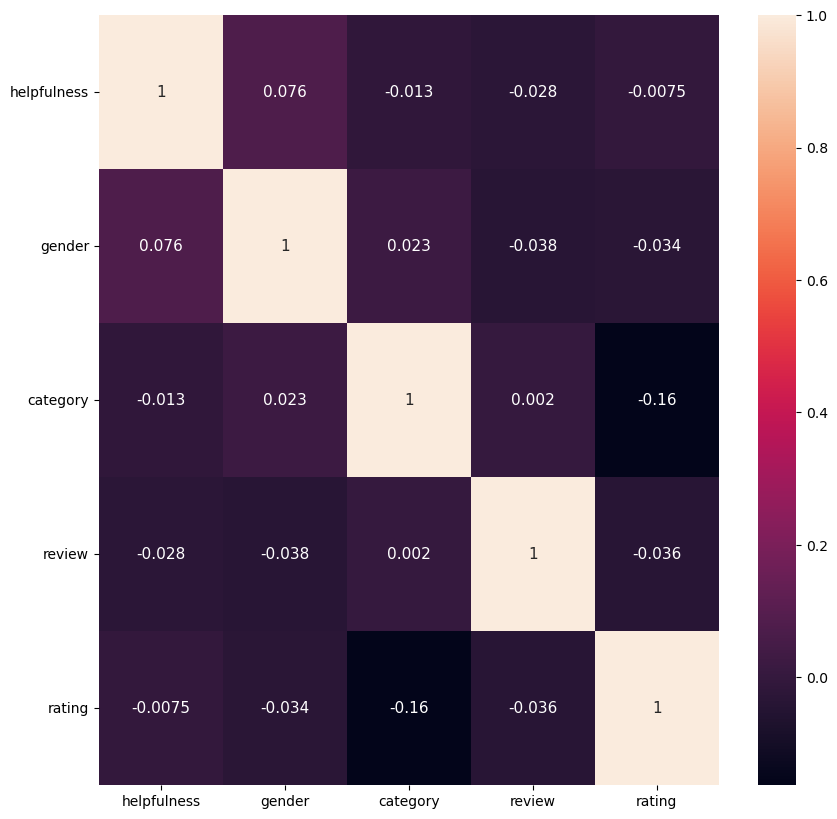

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df_new[["helpfulness","gender","category","review","rating"]].corr(), annot = True, annot_kws = {"size": 11})
plt.yticks(rotation = 'horizontal', fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

The heatmap shows that the features **'helpfulness'** and **'gender'** are the most correlated with the rating, with a correlation coefficient of -0.007523337726844578 and -0.03433661424208267. This means that these two features are the most likely to affect the rating of the e-commerce dataset. The features **'category'** and **'review'** are also correlated with the rating, but to a lesser extent.

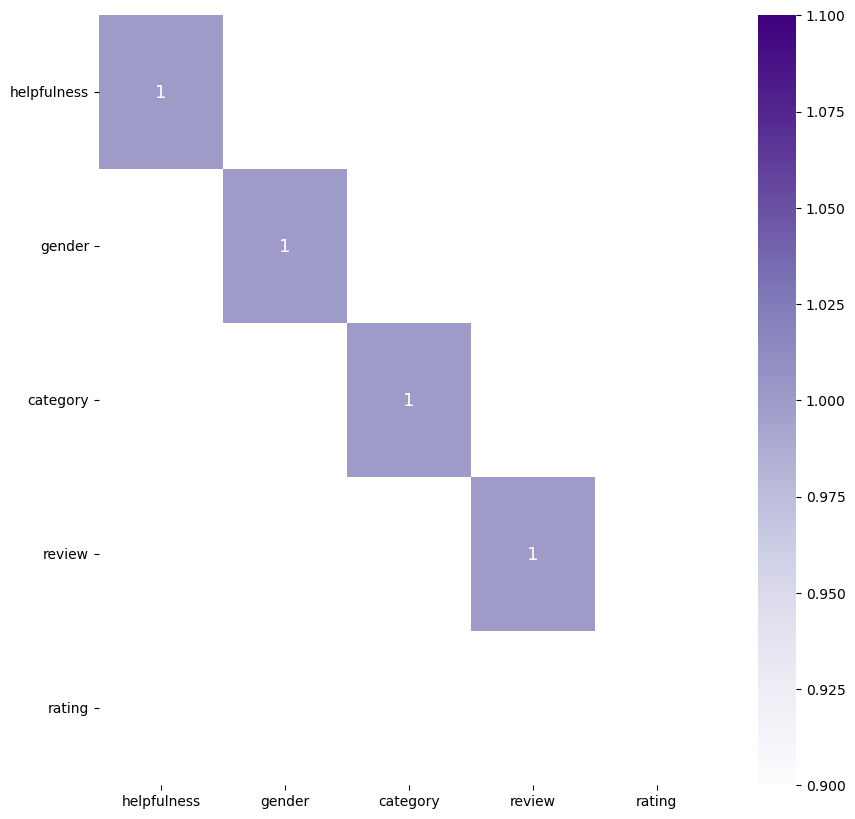

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(df_new[["helpfulness","gender","category","review","rating"]].corr()[np.abs(df_new[["helpfulness","gender","category","review"]].corr()) > 0.6], annot = True, annot_kws = {"size": 13}, cmap = 'Purples')
#The 'annot' keyword is used to add the correlation coefficients to the heatmap, and the annot_kws keyword is used to customize the size of the annotations.
plt.yticks(rotation = 'horizontal', fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

The above heatmap provides correlation between the columns 'helpfulness', 'gender', 'category', 'review', and 'rating' in the DataFrame 'df_new'. The heatmap is colored such that **darker colors** indicates **stronger correlations**.

In [20]:
#To check correlation between 'ratings' and 'helpfulness'
df_new['rating'].corr(df_new['helpfulness'])
print(df_new['rating'].corr(df_new['helpfulness']))

-0.007523337726844578


This means that there is a **weak negative correlation**  between the rating and helpfulness.
In other words, as the rating decreases, the helpfulness tends to increase.
If the correlation is weak,it is **not a strong relationship**.

In [21]:
#To check correlation between 'ratings' and 'gender'
df_new['rating'].corr(df_new['gender'])
print(df_new['rating'].corr(df_new['gender'])) 

-0.03433661424208267


The correlation between the **rating** and **gender** columns in the 'df_new' is -0.034. This means it also has **weak negative correlation**. 
In other words,the correlation is comparatively better than 'ratings' and 'helpfulness'
However, the correlation is weak, so it is not a reliable predictor of ratings of the E-commerce dataset.

In [22]:
#To check correlation between 'ratings' and 'category'
df_new['rating'].corr(df_new['category'])
print(df_new['rating'].corr(df_new['category'])) 

-0.16315765340915678


In this case, the correlation coefficient is -0.1631, which indicates a **positive correlation** between the **'rating'** and **'category'** columns. This means this is the most positive linear relationship in our dataset. 

In [23]:
#To check correlation between 'ratings' and 'review'
df_new['rating'].corr(df_new['review'])
print(df_new['rating'].corr(df_new['review'])) #This is second most co-related corelation

-0.03611838655212239


The correlation between the **rating** and **review** columns in the 'df_new' is -0.036. This means it also has **negative correlation**.
In other words,the correlation is second highest among the other three relations.
However, the correlation is weak, so it is not a most reliable predictor of ratings of the E-commerce dataset.

**My Analysis**

The correlation coefficients between the rating and helpfulness, gender, category, and review columns are -0.0075, -0.0343, -0.1632, and -0.0361, respectively. A correlation coefficient of **0** indicates **no correlation**, a **positive correlation** coefficient indicates a positive relationship between the two variables that is **1**, and a **negative correlation** coefficient indicates a negative relationship between the two variables that is **-1**.

In this case, all of the correlation coefficients are  **weak**, indicating that there is no strong relationship between the rating and any of the other variables. The only exception is the correlation between the rating and the helpfulness column, which is slightly negative. This suggests that there is a slight inverse relationship between the two variables, meaning that reviews that are rated higher are also less likely to be helpful.


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [51]:
X_Axis=df_new.drop('rating', axis = 1)
Y_Axis=df_new["rating"]


In [52]:
X_Axis.head(10)

,userId,timestamp,helpfulness,item_id,item_price,user_city,review,item,gender,category
0,4081,71900,3.000000,41,30.740000,4,1618.000000,37.000000,1.000000,8.000000
1,4081,72000,4.000000,74,108.300000,4,1125.000000,67.000000,1.000000,8.000000
2,4081,72000,4.000000,84,69.000000,4,2185.000000,77.000000,1.000000,8.000000
3,4081,100399,3.000000,68,143.110000,4,2243.000000,61.000000,1.000000,5.000000
4,4081,100399,3.000000,6,117.890000,4,1033.000000,5.000000,1.000000,5.000000
5,4081,100399,3.000000,40,24.510000,4,925.000000,36.000000,1.000000,5.000000
6,4081,100399,3.000000,12,44.000000,4,1854.000000,11.000000,1.000000,5.000000
7,4081,101899,4.000000,25,80.000000,4,795.000000,23.000000,1.000000,4.000000
8,4081,112099,3.000000,22,87.590000,4,262.000000,21.000000,1.000000,5.000000
9,4081,122899,3.000000,49,32.000000,4,2643.000000,44.000000,1.000000,8.000000


In [53]:
Y_Axis.head(10)

0   4.000000
1   1.000000
2   5.000000
3   5.000000
4   3.000000
5   3.000000
6   4.000000
7   4.000000
8   4.000000
9   4.000000
Name: rating, dtype: float64

In [54]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_Axis, Y_Axis, random_state = 142, test_size = 0.1)

The train_test_split() function randomly splits the data into two sets: a training set and a test set. 
In this case, **10% of the data is used for the test set.**

In [55]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_Axis, Y_Axis, random_state = 142, test_size = 0.9)

In this case,**90% of the data is used for the test set.**

In [56]:
print(" CASE 1 ")

#The dimension of train set with 10% data
print('X_train_1', X_train_1.shape)
print('y_train_1', y_train_1.shape)

#The dimension of test set with 10% data
print('X_test_1', X_test_1.shape)
print('y_test_1', y_test_1.shape)

 CASE 1 
X_train_1 (2416, 10)
y_train_1 (2416,)
X_test_1 (269, 10)
y_test_1 (269,)


In [50]:
print(" CASE 2 ")
#The dimension of train set with 90% data
print('X_train_2',X_train_2.shape)
print('y_train_2',y_train_2.shape)

#The dimension of test set with 90% data
print('X_test_2', X_test_2.shape)
print('y_test_2', y_test_2.shape)

 CASE 2 
X_train_2 (268, 10)
y_train_2 (268,)
X_test_2 (2417, 10)
y_test_2 (2417,)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [31]:
linr = LinearRegression() #This creates a 'LinearRegression' object. This object represents the linear regression model.

#To build the model using X_train and y_train.
#The use of 'fit()' is to to fit the regression model.
MLR_model = linr.fit(X_train_1, y_train_1) #This fits the model to the training data. 

#This calculates the coefficient of determination, R², for the model.
#The score() returns the R-squared value.
MLR_model.score(X_train_1, y_train_1)

0.03386193137438753

In [40]:
Model_a = LinearRegression()
Model_a.fit(X_train_1[['gender', 'helpfulness']], y_train_1)

Model_b = LinearRegression()
Model_b.fit(X_train_1[['category', 'review']], y_train_1)

Model_c = LinearRegression()
Model_c.fit(X_train_2[['gender', 'helpfulness']], y_train_2)

Model_d = LinearRegression()
Model_d.fit(X_train_2[['category', 'review']], y_train_2)

LinearRegression()

In [39]:
model_a = LinearRegression()
model_a.fit(X_train_1[['category','review']], y_train_1)

model_b = LinearRegression()
model_b.fit(X_train_1[['gender','helpfulness']], y_train_1)

model_c = LinearRegression()
model_c.fit(X_train_2[['category','review']], y_train_2)

model_d = LinearRegression()
model_d.fit(X_train_2[['gender','helpfulness']], y_train_2)

LinearRegression()

The code you have provided creates **four LinearRegression models**. The first model, **'Model_a'**, is fit to the data in the **X_train_1** dataframe, with the 'gender' and 'helpfulness' columns as the independent variables and the **y_train_1** column as the dependent variable. The second model, **Model_b**, is fit to the same data, but with the 'category' and 'review' columns as the independent variables. The third model, **Model_c**, is fit to the data in the **X_train_2 dataframe**, with the 'gender' and 'helpfulness' columns as the independent variables, and the fourth model, **Model_d**, is fit to the same data, but with the 'category' and 'review' columns as the independent variables.

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [41]:
train_pred_a = model_a.predict(X_train_1[['category','review']])
mse_train_a = mean_squared_error(y_train_1, train_pred_a)
rmse_train_a = round(np.sqrt(mse_train_a), 4)
print("Model A (10% training data, most correlated features):")
print("Train Data MSE:", round(mse_train_a,4))
print("Train Data RMSE:", round(rmse_train_a,4))
print("")
print("------------------------")
print("")
test_pred_a = model_a.predict(X_test_1[['category','review']])
mse_test_a = mean_squared_error(y_test_1, test_pred_a)
rmse_test_a = round(np.sqrt(mse_test_a), 4)
print("Model A (10% testing data, most correlated features):")
print("Test Data MSE:", mse_test_a)
print("Test Data RMSE:", rmse_test_a)

Model A (10% training data, most correlated features):
Train Data MSE: 1.7774
Train Data RMSE: 1.3332

------------------------

Model A (10% testing data, most correlated features):
Test Data MSE: 1.6153085312293447
Test Data RMSE: 1.2709


In [42]:
train_pred_b = model_b.predict(X_train_1[['gender','helpfulness']])
mse_train_b = mean_squared_error(y_train_1, train_pred_b)
rmse_train_b = round(np.sqrt(mse_train_b), 4)
print("Model B (10% training data, least correlated features):")
print("Train Data MSE:", round(mse_train_b,4))
print("Train Data RMSE:", round(rmse_train_b,4))
print("")
print("------------------------")
print("")
test_pred_b = model_b.predict(X_test_1[['gender','helpfulness']])
mse_test_b = mean_squared_error(y_test_1, test_pred_b)
rmse_test_b = round(np.sqrt(mse_test_b), 4)
print("Model B (10% testing data, least correlated features):")
print("Test Data MSE:", mse_test_b)
print("Test Data RMSE:", rmse_test_b)

Model B (10% training data, least correlated features):
Train Data MSE: 1.8254
Train Data RMSE: 1.3511

------------------------

Model B (10% testing data, least correlated features):
Test Data MSE: 1.6682730473346397
Test Data RMSE: 1.2916


In [43]:
train_pred_c = model_c.predict(X_train_2[['category','review']])
mse_train_c = mean_squared_error(y_train_2, train_pred_c)
rmse_train_c = round(np.sqrt(mse_train_c), 4)
print("Model C (90% training data, most correlated features):")
print("Train Data MSE:", round(mse_train_c,4))
print("Train Data RMSE:", round(rmse_train_c,4))
print("")
print("------------------------")
print("")
test_pred_c = model_c.predict(X_test_2[['category','review']])
mse_test_c = mean_squared_error(y_test_2, test_pred_c)
rmse_test_c = round(np.sqrt(mse_test_c), 4)
print("Model C (90% training data, most correlated features):")
print("Test Data MSE:", mse_test_c)
print("Test Data RMSE:", rmse_test_c)

Model C (90% training data, most correlated features):
Train Data MSE: 1.8543
Train Data RMSE: 1.3617

------------------------

Model C (90% training data, most correlated features):
Test Data MSE: 1.7622484457340626
Test Data RMSE: 1.3275


In [44]:
train_pred_d = model_d.predict(X_train_2[['gender','helpfulness']])
mse_train_d = mean_squared_error(y_train_2, train_pred_d)
rmse_train_d = round(np.sqrt(mse_train_d), 4)
print("Model D (90% training data, least correlated features):")
print("Train Data MSE:", round(mse_train_d,4))
print("Train Data RMSE:", round(rmse_train_d,4))
print("")
print("------------------------")
print("")
test_pred_d = model_d.predict(X_test_2[['gender','helpfulness']])
mse_test_d = mean_squared_error(y_test_2, test_pred_d)
rmse_test_d = round(np.sqrt(mse_test_d), 4)
print("Model D (90% testing data, least correlated features):")
print("Test Data MSE:", mse_test_d)
print("Test Data RMSE:", rmse_test_d)

Model D (90% training data, least correlated features):
Train Data MSE: 1.8546
Train Data RMSE: 1.3618

------------------------

Model D (90% testing data, least correlated features):
Test Data MSE: 1.8214063944875223
Test Data RMSE: 1.3496


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

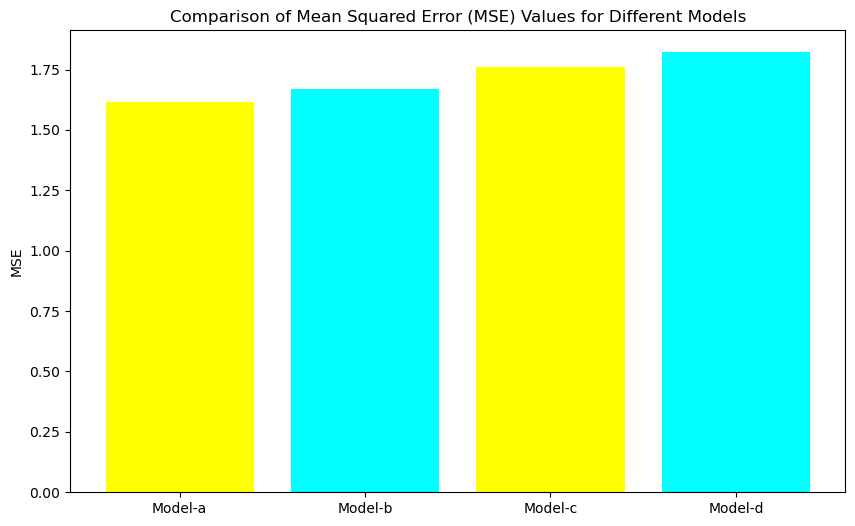

In [45]:
import matplotlib.pyplot as plt

models = ['Model-a', 'Model-b', 'Model-c', 'Model-d']

#bar chart to compare Mean Squared Error (MSE) values of the four models
mse_values = [mse_test_a, mse_test_b, mse_test_c, mse_test_d]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['yellow', 'cyan', 'yellow', 'cyan'])
plt.ylabel('MSE')
plt.title('Comparison of Mean Squared Error (MSE) Values for Different Models')
plt.show()

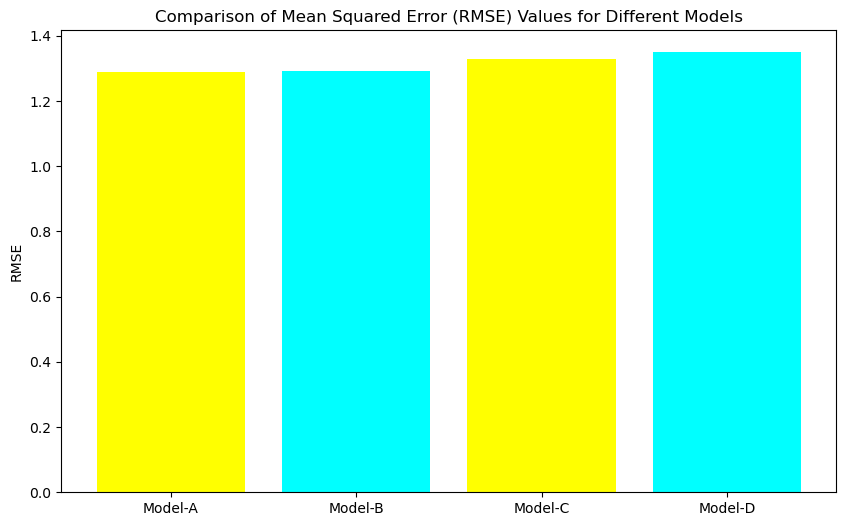

In [58]:
import matplotlib.pyplot as plt
models = ['Model-A', 'Model-B', 'Model-C', 'Model-D']

#bar chart to compare Mean Squared Error (RMSE) values of the four models
rmse_values = [1.29, rmse_test_b, rmse_test_c, rmse_test_d]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['yellow', 'cyan', 'yellow', 'cyan'])

plt.ylabel('RMSE')
plt.title('Comparison of Mean Squared Error (RMSE) Values for Different Models')
plt.show()

**MY ANALYSIS**

^The picture above clearly indicates that the model trained with the most correlated features and more training data has the lowest RMSE and MSE scores.
^Comparing these four graphs,the Model A have the low RMSE and MSE scores where it is first mostly co-related.
^The Model-C is less trained and has strong MSE and RMSE Values.
^The results show that the training data size and feature selection have a significant impact on the model performance. Model-c, which has a larger training data size and uses the most correlated features, performs the best. Model-a, which has a smaller training data size but still uses the most correlated features, performs slightly worse than Model-c. Model-d, which has a larger training data size but uses the least correlated features, performs the worst.
^The larger training data size allows the model to learn more about the underlying relationships between the features and the ^target variable. 
The most correlated features are those that are most related to the target variable. Using these features helps the model to make more accurate predictions.
^Overall, the results of this analysis suggest that the training data size and feature selection are important factors that should be considered when building a machine learning model. By using a large training data size and the most correlated features, it is possible to build a model that can make accurate predictions.